In this notebook the selected point between consecutive -/+ or (+/- or  -/+) is the one with the lowest abs of the first derivate (for waves) or second derivate (for peaks and valleys)

THERE IS A PROBLEM WITH THE DERIVATES, THEY ARE NOT EAQUAL WITH MATHEMATICA. MUST BE LIKE IN MATHEMATICA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_18049/2300134294.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
#reading the data
df=pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/uncover_countries.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,BE,Belgium,EURO,0,0,0,0
1,2020-01-04,BE,Belgium,EURO,0,0,0,0
2,2020-01-05,BE,Belgium,EURO,0,0,0,0
3,2020-01-06,BE,Belgium,EURO,0,0,0,0
4,2020-01-07,BE,Belgium,EURO,0,0,0,0


In [3]:
#selecting italy country
df_italy = df[df['Country_code'] == 'IT'].reset_index(drop=True)
df_italy['Date_reported'] = pd.to_datetime(df_italy['Date_reported'])
df_italy.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,IT,Italy,EURO,0,0,0,0
1,2020-01-04,IT,Italy,EURO,0,0,0,0
2,2020-01-05,IT,Italy,EURO,0,0,0,0
3,2020-01-06,IT,Italy,EURO,0,0,0,0
4,2020-01-07,IT,Italy,EURO,0,0,0,0


In [4]:
df_italy[["Date_reported","New_cases"]].to_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/database.csv")

In [5]:
df_max_scaled = df_italy.copy()
# apply normalization techniques on Column 1
df_max_scaled["norm_new_cases"] = df_max_scaled["New_cases"]/df_max_scaled["New_cases"].abs().max()
df_max_scaled["norm_new_cases"].to_csv("normalizadosPython.csv",index=False)
df_max_scaled["norm_new_cases"]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
994    0.098732
995    0.092419
996    0.098017
997    0.082385
998    0.043862
Name: norm_new_cases, Length: 999, dtype: float64

In [6]:
#applying gaussian filter to new_cases
b=29/2
df_max_scaled["smoothed_new_cases_2"] = gaussian_filter(df_max_scaled['norm_new_cases'], b)
df_max_scaled["smoothed_new_cases_2"].to_csv("suavizadosPyhton.csv",index=False)
df_max_scaled["smoothed_new_cases_2"]

0      3.002517e-07
1      3.306165e-07
2      3.735505e-07
3      4.487395e-07
4      5.536257e-07
           ...     
994    7.812334e-02
995    7.804647e-02
996    7.799198e-02
997    7.795515e-02
998    7.793707e-02
Name: smoothed_new_cases_2, Length: 999, dtype: float64

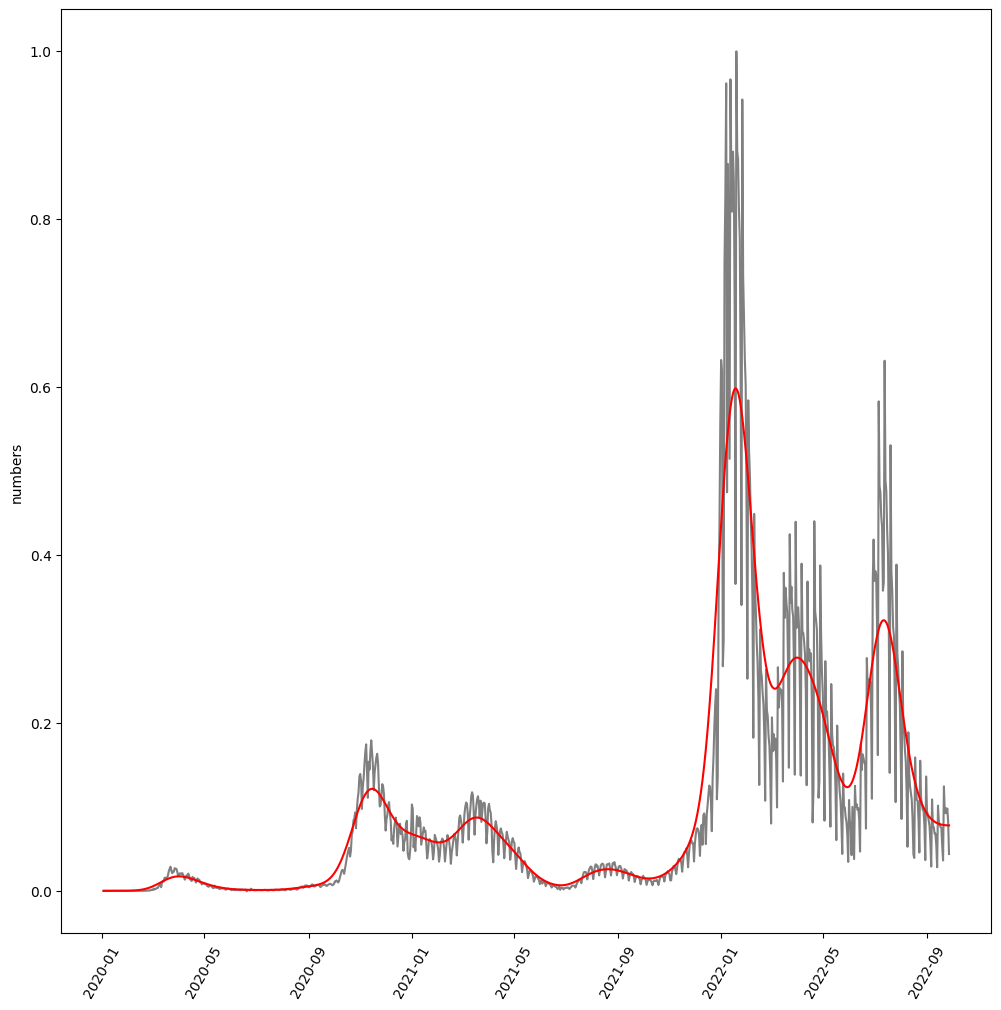

In [7]:
#plotting
plt.figure(figsize=(12,12))
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["norm_new_cases"],color="gray")

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases_2"],color="red")
plt.ylabel('numbers')
plt.xticks(rotation=60)
plt.show()

In [8]:
#df_max_scaled["norm_new_cases"]
#print(df_max_scaled["norm_new_cases"])
#print(len(df_max_scaled["norm_new_cases"]))
#print(len(df_max_scaled["norm_new_cases"][1:]))
#print(df_max_scaled["norm_new_cases"][1:])
#print(len(df_max_scaled["norm_new_cases"][:-1]))
#print(df_max_scaled["norm_new_cases"][:-1])
#print(df_max_scaled["norm_new_cases"][998]-df_max_scaled["norm_new_cases"][997])


In [9]:
#getting the first derivate discrete of the smoothed new cases
df_max_scaled["firstDerivate_new_cases"] = df_max_scaled["smoothed_new_cases_2"].rolling(2).agg(lambda x : x.iloc[1]-x.iloc[0])
print(df_max_scaled["firstDerivate_new_cases"])

0               NaN
1      3.036473e-08
2      4.293398e-08
3      7.518903e-08
4      1.048863e-07
           ...     
994   -9.721768e-05
995   -7.687173e-05
996   -5.448825e-05
997   -3.683345e-05
998   -1.807755e-05
Name: firstDerivate_new_cases, Length: 999, dtype: float64


In [10]:
#applying gaussian filter to "the first derivate discrete of the smoothed new cases"
#why here there is a lot of NaN
b=29/2
df_max_scaled["smoothedFD_new_cases"] = gaussian_filter(df_max_scaled['firstDerivate_new_cases'], b)

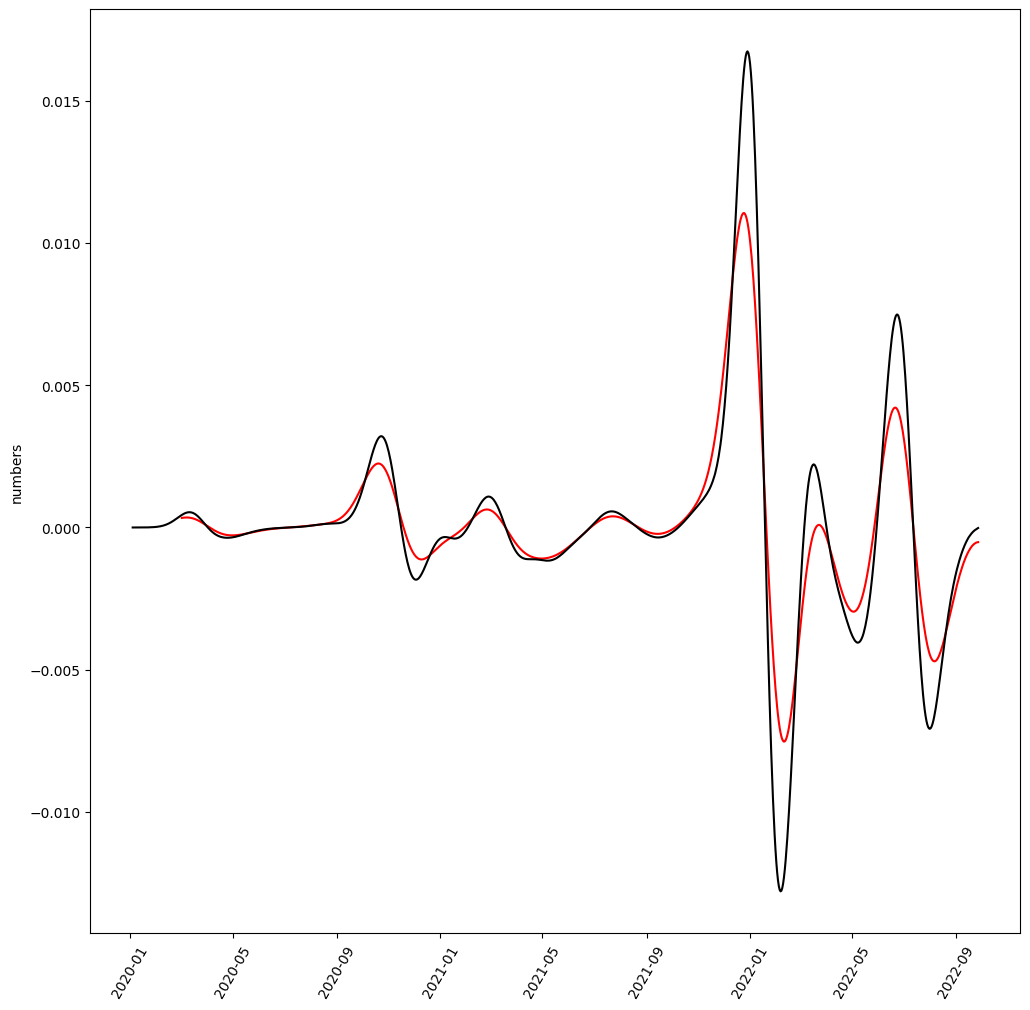

In [11]:
#plotting
plt.figure(figsize=(12,12))

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothedFD_new_cases"] ,color="red")
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["firstDerivate_new_cases"],color="Black")


plt.ylabel('numbers')
plt.xticks(rotation=60)
plt.show()

In [12]:
#getting the second derivate: discreted derivate of the smoothed first derivate
df_max_scaled["secondDerivate_new_cases"] = df_max_scaled["smoothedFD_new_cases"].rolling(2).agg(lambda x : x.iloc[1]-x.iloc[0])

In [13]:
df_max_scaled[["firstDerivate_new_cases","smoothedFD_new_cases","secondDerivate_new_cases"]].to_csv("derivatesPython.csv",index=False)

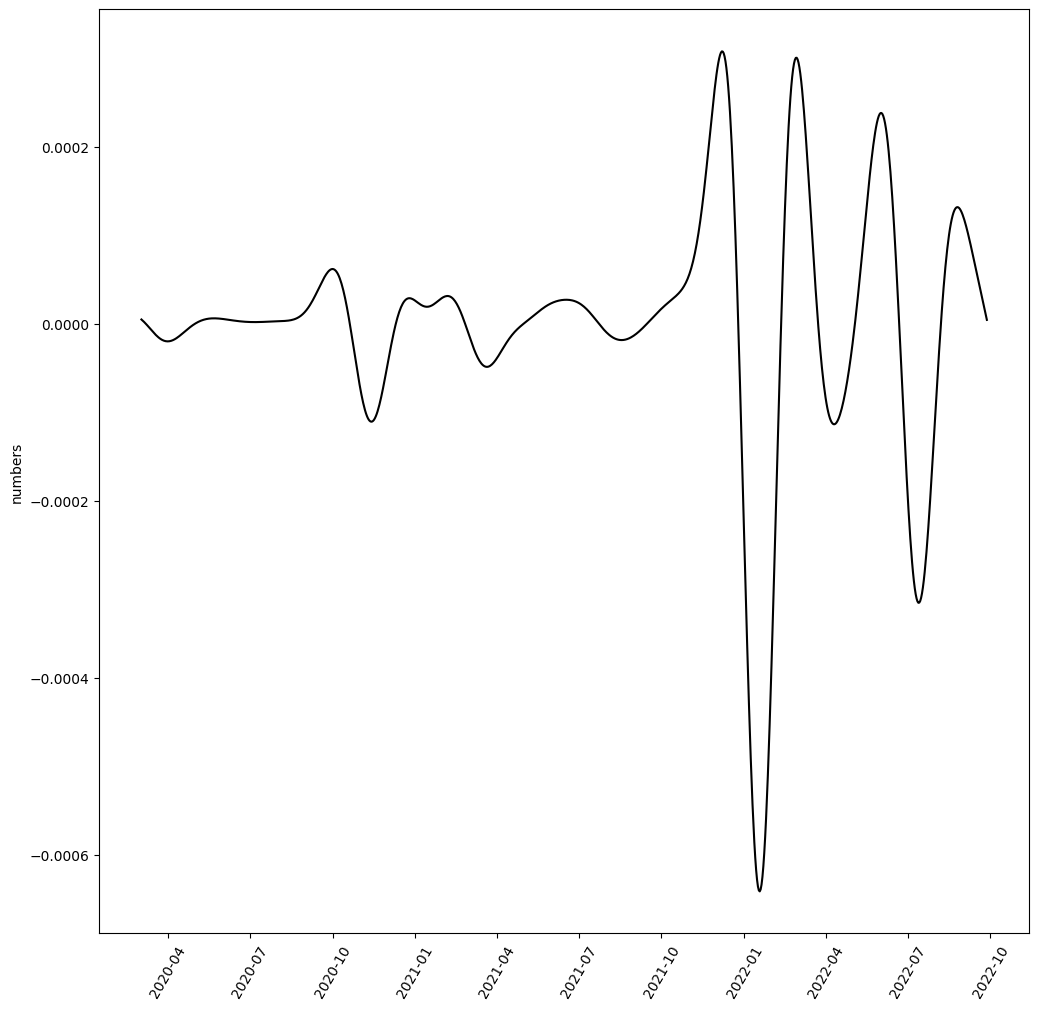

In [14]:
#plotting
plt.figure(figsize=(12,12))

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["secondDerivate_new_cases"],color="Black")


plt.ylabel('numbers')
plt.xticks(rotation=60)
plt.show()

To detect waves we used the first derivated smooted and second derivate: 

    1. detect consecutive NEGATIVE-POSITIVE

In [15]:
df_max_scaled["smoothedFDrolling"]= (df_max_scaled["smoothedFD_new_cases"].rolling(2).agg(lambda x : True if x.iloc[0]<0 and x.iloc[1]>0 else False)).fillna(False)
df_max_scaled["smoothedFDrolling"]

0      False
1      False
2      False
3      False
4      False
       ...  
994      0.0
995      0.0
996      0.0
997      0.0
998      0.0
Name: smoothedFDrolling, Length: 999, dtype: object

In [16]:
#(df_max_scaled["smoothedFDrolling"]==False).sum()
#(df_max_scaled["smoothedFDrolling"]==True).sum()
#(df_max_scaled["smoothedFDrolling"].isna()).sum()
#df_max_scaled["smoothedFDrolling"].value_counts()

In [17]:
# Alexis' aproximation
df_2=df_max_scaled[df_max_scaled["smoothedFDrolling"]==True][["Date_reported","smoothedFD_new_cases"]].reset_index(drop=True)
df_2

,Date_reported,smoothedFD_new_cases
0,2020-07-07,0.000002
1,2021-01-29,0.000008
2,2021-06-27,0.000001
3,2021-10-05,0.000007
4,2022-03-20,0.000017
5,2022-05-28,0.000104


In [18]:
df_3=df_max_scaled[df_max_scaled["Date_reported"].isin(list(df_2["Date_reported"] - datetime.timedelta(days=1)))][["Date_reported","smoothedFD_new_cases"]].reset_index(drop=True)
df_3.rename(columns={'Date_reported':'Date_reported_1',"smoothedFD_new_cases":"smoothedFD_new_cases_1"},inplace=True)
df_3

,Date_reported_1,smoothedFD_new_cases_1
0,2020-07-06,-2.839648e-07
1,2021-01-28,-2.073177e-05
2,2021-06-26,-2.454093e-05
3,2021-10-04,-1.401276e-05
4,2022-03-19,-3.740023e-05
5,2022-05-27,-1.229206e-04


In [19]:
#these are the consecutive NEGATIVE-POSITIVE
df_concatenate1=pd.concat([df_2, df_3],axis=1)
df_concatenate1

,Date_reported,smoothedFD_new_cases,Date_reported_1,smoothedFD_new_cases_1
0,2020-07-07,0.000002,2020-07-06,-2.839648e-07
1,2021-01-29,0.000008,2021-01-28,-2.073177e-05
2,2021-06-27,0.000001,2021-06-26,-2.454093e-05
3,2021-10-05,0.000007,2021-10-04,-1.401276e-05
4,2022-03-20,0.000017,2022-03-19,-3.740023e-05
5,2022-05-28,0.000104,2022-05-27,-1.229206e-04


    2. select the date associated to each position (negative, positive) with the lowest Abs[smoothedFD]

In [20]:
#the dates with the lowest Abs[smoothedFD_new_cases] associated
a1=list(df_concatenate1.agg(lambda x : x.Date_reported if abs(x.smoothedFD_new_cases)<abs(x.smoothedFD_new_cases_1)  else x.Date_reported_1,axis=1))
a1

[Timestamp('2020-07-06 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-06-27 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2022-03-20 00:00:00'),
 Timestamp('2022-05-28 00:00:00')]

In [21]:
#the dates with the lowest Abs[smoothedFD_new_cases] associated
a1=list(df_concatenate1.agg(lambda x : x["Date_reported"]if abs(x["smoothedFD_new_cases"])<abs(x["smoothedFD_new_cases_1"])  else x["Date_reported_1"],axis=1))
a1

[Timestamp('2020-07-06 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-06-27 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2022-03-20 00:00:00'),
 Timestamp('2022-05-28 00:00:00')]

In [22]:
cutDays1=df_max_scaled[df_max_scaled["Date_reported"].isin(a1)].reset_index(drop = True)
cutDays1

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,norm_new_cases,smoothed_new_cases_2,firstDerivate_new_cases,smoothedFD_new_cases,secondDerivate_new_cases,smoothedFDrolling
0,2020-07-06,IT,Italy,EURO,192,241611,7,34861,0.000842,0.000993,-0.000002,-2.839648e-07,0.000002,0.0
1,2021-01-29,IT,Italy,EURO,14360,2515507,492,87381,0.062948,0.057978,-0.000185,7.615702e-06,0.000028,1.0
2,2021-06-27,IT,Italy,EURO,838,4257289,40,127458,0.003673,0.006606,0.000020,1.201284e-06,0.000026,1.0
3,2021-10-05,IT,Italy,EURO,1612,4683646,37,131068,0.007066,0.014831,-0.000088,7.088932e-06,0.000021,1.0
4,2022-03-20,IT,Italy,EURO,75768,13800179,85,157692,0.332137,0.264698,0.002093,1.690856e-05,0.000054,1.0
5,2022-05-28,IT,Italy,EURO,20051,17355119,105,166476,0.087896,0.124065,-0.000834,1.043445e-04,0.000227,1.0


In [23]:
#Lina's approximation
#def selecting(a,b):
#     return df_max_scaled['Date_reported2'][a] if df_max_scaled["smoothedFD_new_cases"][a] < df_max_scaled["smoothedFD_new_cases"][b] else df_max_scaled['Date_reported2'][b]
    
#%time
#positions1 = np.where(df_max_scaled["smoothedFDrolling"]==True)[0] #positive
#positions2= positions1-1 #negative
#cutDays=[selecting(a, b) for a, b in zip(positions1, positions2)]
#cutDays

    3. From this cutdays(dates) select those with the second derivate (discrete derivate of the first derivate )higher than the threshold 

In [24]:
#this is set up by the user
thresholdP= 2.5*10**-5

In [25]:
d0=cutDays1.agg(lambda x : x["Date_reported"] if  x["secondDerivate_new_cases"] > thresholdP else [],axis=1)
d0

0                     []
1    2021-01-29 00:00:00
2    2021-06-27 00:00:00
3                     []
4    2022-03-20 00:00:00
5    2022-05-28 00:00:00
dtype: object

In [26]:
dates = pd.to_datetime(d0.explode())
dates=dates[~np.isnat(dates)]
dates

1   2021-01-29
2   2021-06-27
4   2022-03-20
5   2022-05-28
dtype: datetime64[ns]

    4. Plot the days

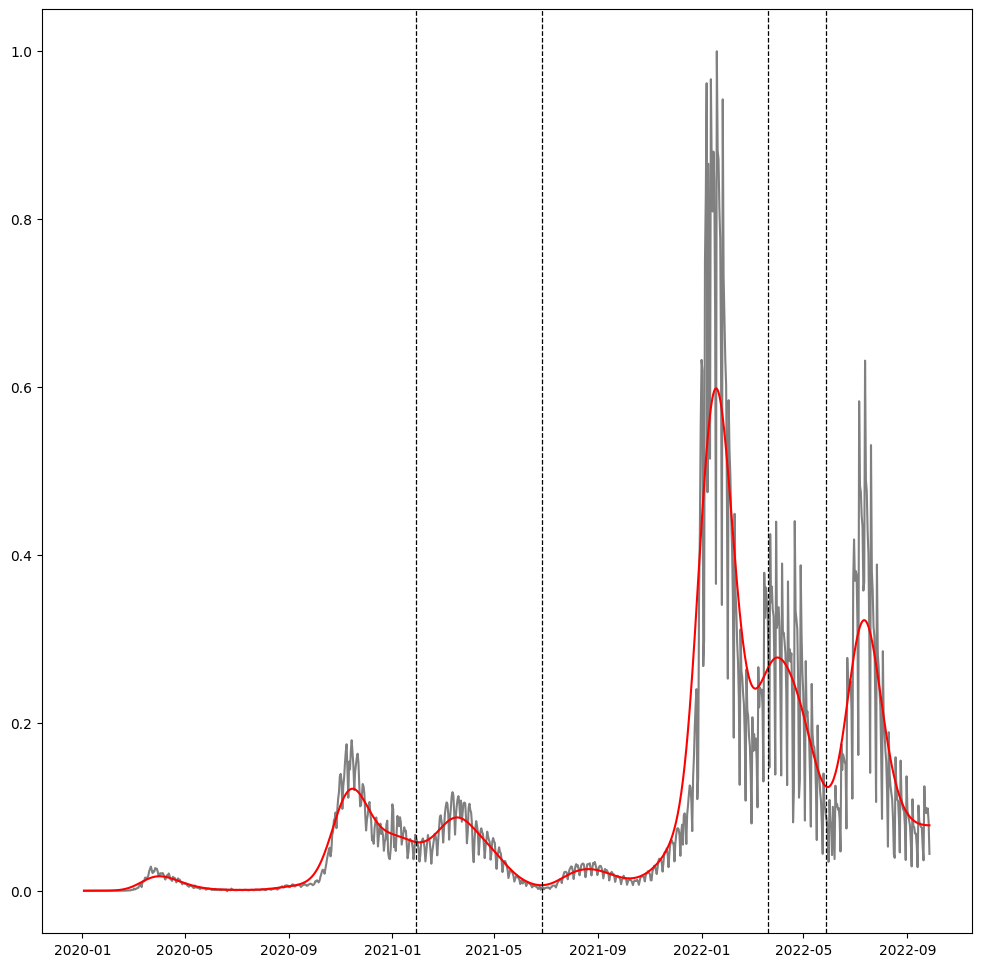

In [27]:
#fig, ax = plt.subplots()

cases =df_max_scaled["norm_new_cases"]

plt.figure(figsize=(12,12))


plt.plot(df_max_scaled["Date_reported"],cases,color="gray")
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases_2"],color="red")


#plt.ylabel('numbers')
#plt.xticks(rotation=60)
#plt.show()



# Plot vertical lines at each date
for date in dates:
    plt.axvline(x=date, color='black', ymax= max(cases), linestyle='--', linewidth=.91)

# Set the y-axis limits
#ax.set_ylim(0, 1)

# Hide the y-axis ticks and labels
#ax.set_yticks([])

# Show the plot
#plt.show()

To detect peaks/valleys we used the second derivate (discrete derivate of the first derivate ): 

    1.Detect POSITIVE-NEGATIVE and NEGATIVE-POSITIVE points in the second derivate:

In [28]:
df_max_scaled["smoothedFDrolling2"]= (df_max_scaled["secondDerivate_new_cases"].rolling(2).agg(lambda x : True if (x.iloc[0]<0 and x.iloc[1]>0) or (x.iloc[0]>0 and x.iloc[1]<0) else False)).fillna(False)
df_max_scaled["smoothedFDrolling2"]

0      False
1      False
2      False
3      False
4      False
       ...  
994      0.0
995      0.0
996      0.0
997      0.0
998      0.0
Name: smoothedFDrolling2, Length: 999, dtype: object

In [29]:
print((df_max_scaled["smoothedFDrolling2"]==False).sum())
print((df_max_scaled["smoothedFDrolling2"]==True).sum())
print((df_max_scaled["smoothedFDrolling2"].isna()).sum())
print(df_max_scaled["smoothedFDrolling2"].value_counts())

985
14
0
False    985
1.0       14
Name: smoothedFDrolling2, dtype: int64


In [30]:
df_4=df_max_scaled[df_max_scaled["smoothedFDrolling2"]==1][["Date_reported","secondDerivate_new_cases"]].reset_index(drop=True)
df_4

,Date_reported,secondDerivate_new_cases
0,2020-03-09,-9.703867e-07
1,2020-05-01,3.610893e-08
2,2020-10-21,-4.686397e-06
3,2020-12-11,3.338808e-06
4,2021-02-26,-2.357486e-06
5,2021-05-01,3.371929e-07
6,2021-07-24,-2.574163e-07
7,2021-09-15,4.435419e-07
8,2021-12-26,-2.885578e-05
9,2022-02-11,9.629155e-06


In [31]:
df_5=df_max_scaled[df_max_scaled["Date_reported"].isin(list(df_4["Date_reported"] - datetime.timedelta(days=1)))][["Date_reported","secondDerivate_new_cases"]].reset_index(drop=True)
df_5.rename(columns={'Date_reported':'Date_reported_1',"secondDerivate_new_cases":"secondDerivate_new_cases_1"},inplace=True)
df_5

,Date_reported_1,secondDerivate_new_cases_1
0,2020-03-08,1.474033e-07
1,2020-04-30,-6.271477e-07
2,2020-10-20,1.488628e-06
3,2020-12-10,-6.646792e-07
4,2021-02-25,5.722909e-07
5,2021-04-30,-4.940943e-07
6,2021-07-23,1.013756e-06
7,2021-09-14,-6.193888e-07
8,2021-12-25,5.515717e-06
9,2022-02-10,-2.429712e-05


In [32]:
#these are the consecutive +/- and -/+
df_concatenate2=pd.concat([df_4, df_5], axis=1)
df_concatenate2

,Date_reported,secondDerivate_new_cases,Date_reported_1,secondDerivate_new_cases_1
0,2020-03-09,-9.703867e-07,2020-03-08,1.474033e-07
1,2020-05-01,3.610893e-08,2020-04-30,-6.271477e-07
2,2020-10-21,-4.686397e-06,2020-10-20,1.488628e-06
3,2020-12-11,3.338808e-06,2020-12-10,-6.646792e-07
4,2021-02-26,-2.357486e-06,2021-02-25,5.722909e-07
5,2021-05-01,3.371929e-07,2021-04-30,-4.940943e-07
6,2021-07-24,-2.574163e-07,2021-07-23,1.013756e-06
7,2021-09-15,4.435419e-07,2021-09-14,-6.193888e-07
8,2021-12-26,-2.885578e-05,2021-12-25,5.515717e-06
9,2022-02-11,9.629155e-06,2022-02-10,-2.429712e-05


    2. Select from each consequitve -/+ or +/- the date with the lowest abs[second derivate]

In [33]:
a2= list(df_concatenate2.agg(lambda x : x.Date_reported if abs(x.secondDerivate_new_cases)<abs(x.secondDerivate_new_cases_1)  else x.Date_reported_1,axis=1))
a2

[Timestamp('2020-03-08 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-10-20 00:00:00'),
 Timestamp('2020-12-10 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-07-24 00:00:00'),
 Timestamp('2021-09-15 00:00:00'),
 Timestamp('2021-12-25 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-05-04 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-08-07 00:00:00')]

In [34]:
cutDays2=(df_max_scaled[df_max_scaled["Date_reported"].isin(a2)].reset_index(drop = True))[["Date_reported","secondDerivate_new_cases"]]
cutDays2#this is the dataframe when the first number of the second derivate is positive

,Date_reported,secondDerivate_new_cases
0,2020-03-08,1.474033e-07
1,2020-05-01,3.610893e-08
2,2020-10-20,1.488628e-06
3,2020-12-10,-6.646792e-07
4,2021-02-25,5.722909e-07
5,2021-05-01,3.371929e-07
6,2021-07-24,-2.574163e-07
7,2021-09-15,4.435419e-07
8,2021-12-25,5.515717e-06
9,2022-02-11,9.629155e-06


    3. Now we have only one date associated to each cut point. The set of cut points are pairs that delimited the peaks or valleys. Now we should select the consecutive pair with an associated lowest second derivate lower than the Negative Threshold:

        NOTE: Remember that we first take the lowest second derivate between the consecutive cutdays, and then this lowest value is compared with the negative threshold. In other words, we looked for the lowest second derivate values in the set of negative values between a pair of cutdays. The pairs are organized depending on the sign of the first value of the second derivate:

        a. for those with the positive sign: the consecutive pair start in the first cutdays2 set of dates

In [35]:
signFirstValueSecondD="positive" if df_5["secondDerivate_new_cases_1"][0] > 0 else "negative"
signFirstValueSecondD# this is important to define the consequitive cut points that have only negative numbers

'positive'

In [36]:
thresholdN= -9*10**-5 #thr negative
thresholdN

-9e-05

In [37]:
cutDays22 = cutDays2["Date_reported"]
cutDays22

0    2020-03-08
1    2020-05-01
2    2020-10-20
3    2020-12-10
4    2021-02-25
5    2021-05-01
6    2021-07-24
7    2021-09-15
8    2021-12-25
9    2022-02-11
10   2022-03-24
11   2022-05-04
12   2022-06-22
13   2022-08-07
Name: Date_reported, dtype: datetime64[ns]

In [46]:
type(cutDays22)

pandas.core.series.Series

In [38]:
d=cutDays22.groupby(cutDays22.index//2).agg(lambda x : x if  min(
        df_max_scaled[
            (df_max_scaled["Date_reported"]>=x.iloc[0]) & 
            (df_max_scaled["Date_reported"]<=x.iloc[1])
        ]["secondDerivate_new_cases"]# in this way we get all the second derivate values between consecutive pair of cutdays
) < thresholdN else [])
d

0                                            []
1    [2020-10-20 00:00:00, 2020-12-10 00:00:00]
2                                            []
3                                            []
4    [2021-12-25 00:00:00, 2022-02-11 00:00:00]
5    [2022-03-24 00:00:00, 2022-05-04 00:00:00]
6    [2022-06-22 00:00:00, 2022-08-07 00:00:00]
Name: Date_reported, dtype: object

In [39]:
dates = pd.to_datetime(d.explode())
dates=dates[~np.isnat(dates)]
dates

1   2020-10-20
1   2020-12-10
4   2021-12-25
4   2022-02-11
5   2022-03-24
5   2022-05-04
6   2022-06-22
6   2022-08-07
Name: Date_reported, dtype: datetime64[ns]

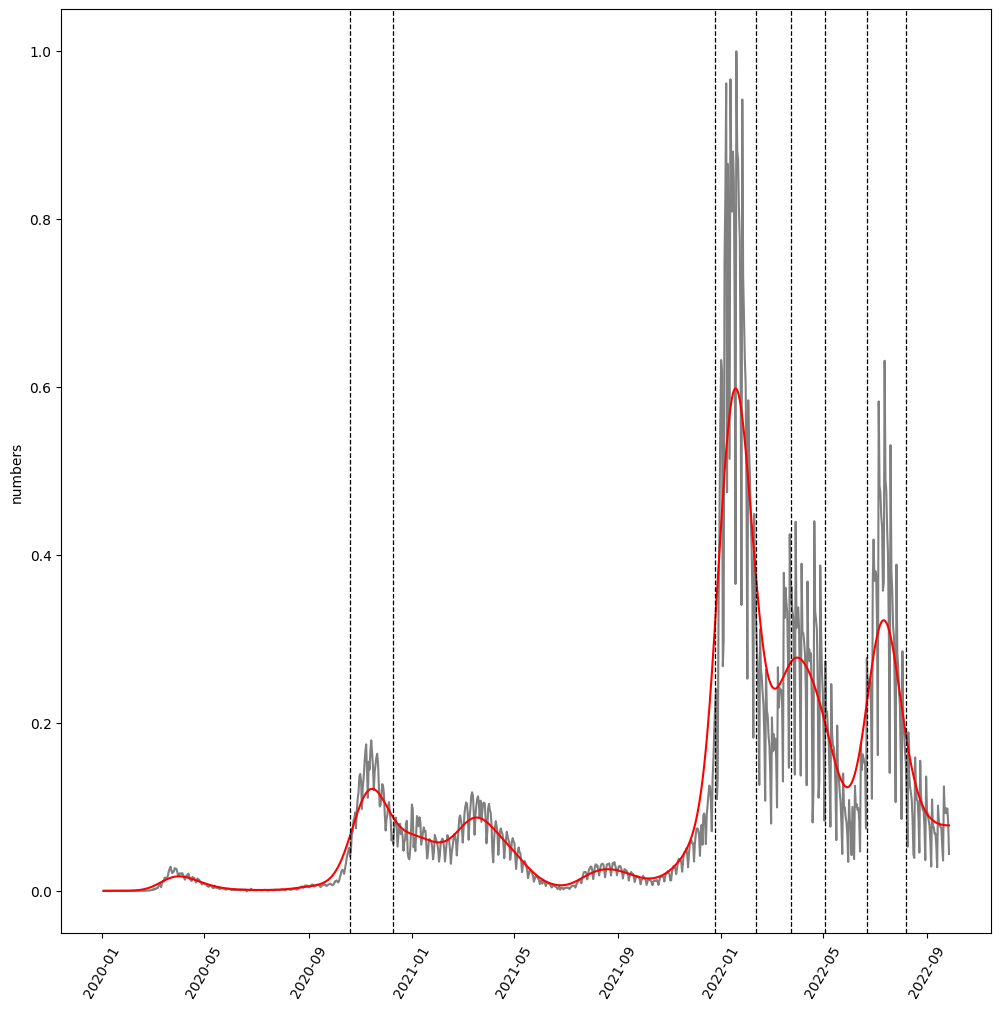

In [40]:
cases =df_max_scaled["norm_new_cases"]
plt.figure(figsize=(12,12))

plt.plot(df_max_scaled["Date_reported"],cases,color="gray")
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases_2"],color="red")

plt.ylabel('numbers')
plt.xticks(rotation=60)

# Plot vertical lines at each date
for date in dates :
    plt.axvline(x=date, color='black', ymax= max(cases), linestyle='--', linewidth=.91)

        b. for those with the negative sign:  the consecutive pair start and finalize in the first and last Date_reported, respectivelly

In [41]:
cutDays23=pd.concat([df_max_scaled["Date_reported"].iloc[[0]],cutDays22,df_max_scaled["Date_reported"].iloc[[-1]]]).reset_index(drop=True)
cutDays23

0    2020-01-03
1    2020-03-08
2    2020-05-01
3    2020-10-20
4    2020-12-10
5    2021-02-25
6    2021-05-01
7    2021-07-24
8    2021-09-15
9    2021-12-25
10   2022-02-11
11   2022-03-24
12   2022-05-04
13   2022-06-22
14   2022-08-07
15   2022-09-27
Name: Date_reported, dtype: datetime64[ns]

In [42]:
d2=cutDays23.groupby(cutDays23.index//2).agg(lambda x : x if  min(
        df_max_scaled[
            (df_max_scaled["Date_reported"]>=x.iloc[0]) & 
            (df_max_scaled["Date_reported"]<=x.iloc[1])
        ]["secondDerivate_new_cases"]) < thresholdN else [])
d2

0    []
1    []
2    []
3    []
4    []
5    []
6    []
7    []
Name: Date_reported, dtype: object

In [43]:
dates2 = pd.to_datetime(d2.explode())
dates2=dates2[~np.isnat(dates2)]
dates2

Series([], Name: Date_reported, dtype: datetime64[ns])

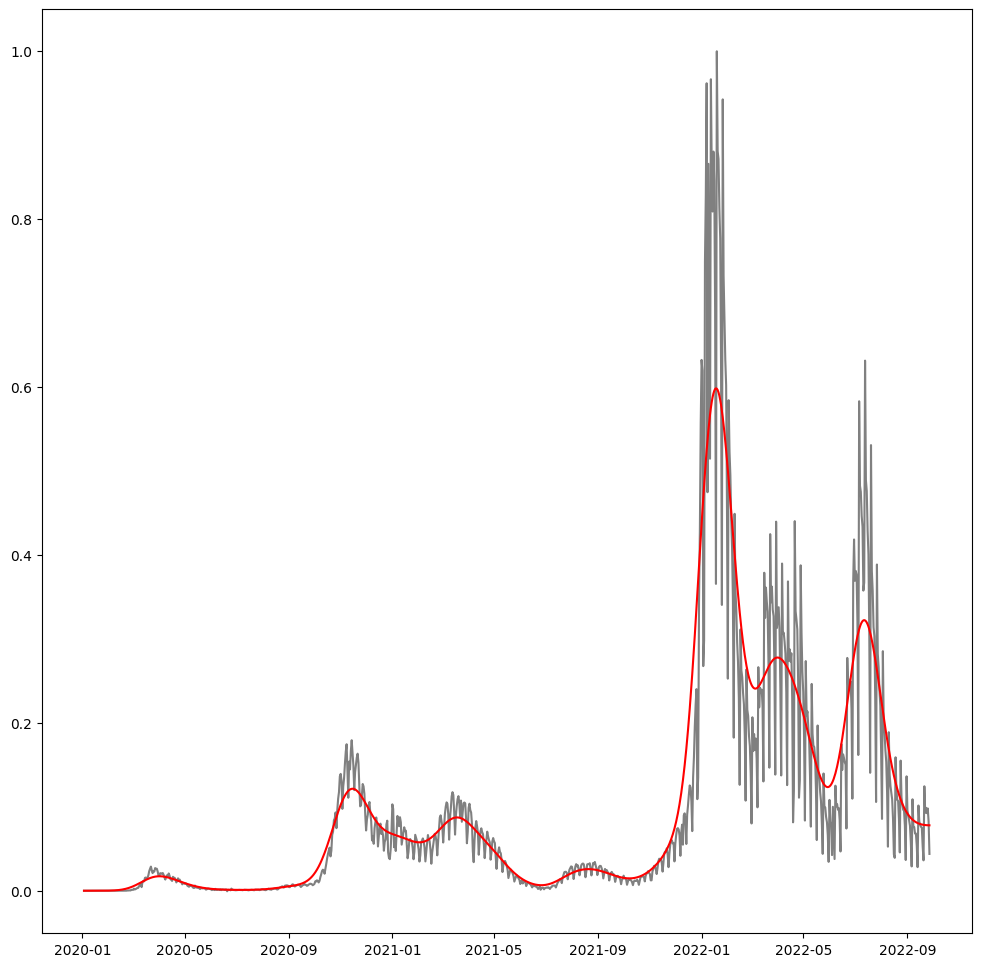

In [44]:
plt.figure(figsize = (12,12))
plt.plot(df_max_scaled["Date_reported"], df_max_scaled["norm_new_cases"], color="gray")
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases_2"],color="red")
for date in dates2:
    plt.axvline(x=date, color="black", ymax=max(df_max_scaled["norm_new_cases"]), linestyle='--', linewidth=.91)

In [45]:
#Radio
n0 = 1000
tm = 
function = lambda x: n0 * exp(-(ln(2)/tm))

SyntaxError: invalid syntax (1586503064.py, line 3)